# Support Vector Machine (SVM)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Heart.csv')
X = dataset.drop(columns=['target'])
y= dataset['target']

## Splitting the dataset into the Training set and Test set

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the SVM model on the Training set

In [5]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

## Predicting the Test set results

In [6]:
y_pred = classifier.predict(X_test)

## Making the Confusion Matrix

In [7]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy: % {:.2f} ".format(accuracy_score(y_test, y_pred)*100))

[[24  9]
 [ 2 41]]
Accuracy: % 85.53 


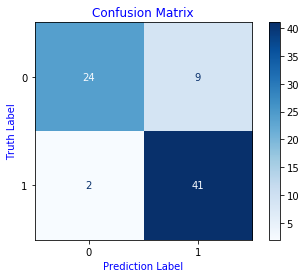

In [8]:
from sklearn.metrics import plot_confusion_matrix
matrix = plot_confusion_matrix(classifier,X_test, y_test,cmap=plt.cm.Blues)
matrix.ax_.set_title("Confusion Matrix",color = "blue")
plt.xlabel("Prediction Label", color = "Blue")
plt.ylabel("Truth Label", color = "Blue")
plt.savefig('SVC.png')
plt.show()

In [9]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: % {:.2f} ".format(accuracies.mean()*100))
print("Standard Deviation: % {:.2f} ".format(accuracies.std()*100))

Accuracy: % 81.05 
Standard Deviation: % 6.25 
